In [37]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import sys
import math
import numpy as np

def set_max_recursion(num):
    sys.setrecursionlimit(num)
    
def get_audio_data(filename):
    data = read(filename)
    rate = data[0]
    audio_data = [rate, []]
    for i in range(0, len(data[1])):
        data_i = data[1][i]
        audio_data[1].append(data_i[0].astype(np.int32))
    return audio_data

def get_audio_data_const(filename):
    data = read(filename)
    rate = data[0]
    audio_data = [rate, []]
    for i in range(0, len(data[1])):
        data_i = data[1][i]
        audio_data[1].append(((data_i.astype(np.int32))))
    return audio_data

def get_max_time(audio_data):
    return len(audio_data[1]) / audio_data[0]

def f(audio_data, t):
    rate = audio_data[0]
    index = int(t * rate)
    return audio_data[1][index]

def fsin2pi(f, audio_data, w, t):
    return f(audio_data, t) * math.sin(2 * math.pi * w * t)

def fcos2pi(f, audio_data, w, t):
    return f(audio_data, t) * math.cos(2 * math.pi * w * t)

def simpson(g, audio_data, a, b, w):
    rate = audio_data[0]
    
    h = 1 / rate
    
    if a + 2 * h > b: return 0
    
    y0 = g(f, audio_data, w, a)
    y1 = g(f, audio_data, w, a + h)
    y2 = g(f, audio_data, w, a + 2 * h)
        
    return h / 3 * (y0 + 4 * y1 + y2) + simpson(g, audio_data, a + 2 * h, b, w)

def get_freq_magnitude(start_time, end_time, audio_data, w):
    sin_val = simpson(fsin2pi, audio_data, start_time, end_time, w)
    cos_val = simpson(fcos2pi, audio_data, start_time, end_time, w)
    return math.sqrt(sin_val**2 + cos_val**2)

def get_table(filename, start_time, end_time, start_w, end_w, step_w):
    audio_data = get_audio_data(filename)
    w = start_w
    while w <= end_w:
        print(w, "Hz:", get_freq_magnitude(start_time, end_time, audio_data, w))
        w += step_w

def draw_file(filename, i=0):
    # read audio samples
    input_data = read(filename)
    audio = input_data[1]
    # plot first 100 
    if i == 0:
        plt.plot(audio)
    else:
        plt.plot(audio[:i])
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title  
    plt.title(filename)
    # display the plot
    plt.show()
    
def draw_data(audio_data, i=0):
    # plot first 100 
    if i == 0:
        plt.plot(audio_data[1])
    else:
        plt.plot(audio_data[1][:i])
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title  
    plt.title("audio_data")
    # display the plot
    plt.show()

In [38]:
set_max_recursion(1000000)
filename = 'hello.wav'
audio_data = get_audio_data(filename)
max_time = get_max_time(audio_data)

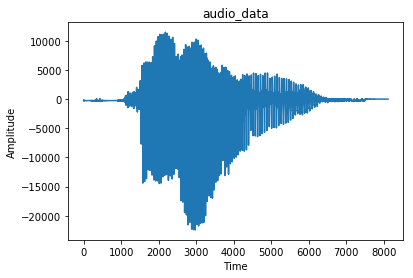

In [35]:
draw_data(audio_data)

In [36]:
audio_data

[11025,
 [-174,
  -247,
  -282,
  -320,
  -307,
  -272,
  -267,
  -252,
  -233,
  -255,
  -267,
  -237,
  -221,
  -233,
  -237,
  -243,
  -256,
  -262,
  -264,
  -274,
  -276,
  -269,
  -268,
  -277,
  -280,
  -272,
  -268,
  -272,
  -269,
  -267,
  -269,
  -260,
  -255,
  -258,
  -258,
  -254,
  -257,
  -260,
  -257,
  -254,
  -254,
  -251,
  -249,
  -250,
  -250,
  -245,
  -243,
  -246,
  -247,
  -249,
  -257,
  -258,
  -254,
  -260,
  -264,
  -263,
  -264,
  -264,
  -257,
  -252,
  -252,
  -247,
  -252,
  -267,
  -271,
  -265,
  -261,
  -257,
  -254,
  -255,
  -259,
  -261,
  -268,
  -271,
  -266,
  -264,
  -265,
  -267,
  -266,
  -260,
  -254,
  -249,
  -246,
  -247,
  -249,
  -250,
  -255,
  -258,
  -260,
  -260,
  -262,
  -264,
  -264,
  -266,
  -264,
  -257,
  -259,
  -254,
  -249,
  -249,
  -245,
  -246,
  -245,
  -245,
  -245,
  -243,
  -252,
  -255,
  -252,
  -256,
  -260,
  -261,
  -262,
  -259,
  -255,
  -254,
  -250,
  -247,
  -240,
  -241,
  -243,
  -236,
  -238,
  -238,


In [39]:
max_time

0.7356916099773243

In [40]:
get_table(filename, 0, max_time, 100, 20000, 100)

100 Hz: 4.435643341146284
200 Hz: 67.58542596586223
300 Hz: 8.814012303330905
400 Hz: 26.164158190381382
500 Hz: 28.73856082745412
600 Hz: 16.158105924442594
700 Hz: 122.05492701634073
800 Hz: 11.373874374552823
900 Hz: 14.021309621672275
1000 Hz: 9.936506808603335
1100 Hz: 16.309942556797573
1200 Hz: 5.369741112274316
1300 Hz: 10.049804582376204
1400 Hz: 17.44689217780713
1500 Hz: 7.270069179589054
1600 Hz: 23.034133841727026
1700 Hz: 6.407014915787338
1800 Hz: 2.3000768523238064
1900 Hz: 8.30270676252264
2000 Hz: 3.1138818282328145
2100 Hz: 1.8668797159339727
2200 Hz: 0.9881646714222367
2300 Hz: 2.4007045065100154
2400 Hz: 4.894563020856658
2500 Hz: 0.5232998031163337
2600 Hz: 0.8044131559313665
2700 Hz: 1.4129435225924734
2800 Hz: 0.7439125310392898
2900 Hz: 2.6532017618063812
3000 Hz: 0.49893296247217916
3100 Hz: 1.1905299352426097
3200 Hz: 4.413418629410653
3300 Hz: 0.4158335095551534
3400 Hz: 0.802217808023673
3500 Hz: 2.3389605825739253
3600 Hz: 6.989947056631958
3700 Hz: 3.5018